In [221]:
import pandas as pd
import matplotlib.pyplot as plt

# 5@Recall vs Distance Count

In [222]:
df = pd.read_csv('../results/results_16m32m0.csv')
df.sample(3)

,algorithm,params,merge distance count,ef=32 5@recall,ef=32 dist count,ef=40 5@recall,ef=40 dist count,ef=50 5@recall,ef=50 dist count,ef=64 5@recall,ef=64 dist count,ef=72 5@recall,ef=72 dist count
6,IGTM,"{'jump_ef': 20, 'local_ef': 5, 'next_step_k': ...",1032703581,0.89836,922.5001,0.91984,1064.6333,0.93778,1236.8740,0.95320,1471.4063,0.95970,1602.2116
40,SIGM,{'ef_construction': 32},4950123948,0.91252,931.6779,0.93174,1076.5605,0.94766,1252.8737,0.96102,1492.0429,0.96616,1624.5838
7,IGTM,"{'jump_ef': 20, 'local_ef': 5, 'next_step_k': ...",1028849742,0.89768,921.3854,0.91950,1063.3353,0.93716,1235.3536,0.95332,1469.9219,0.95972,1600.9027


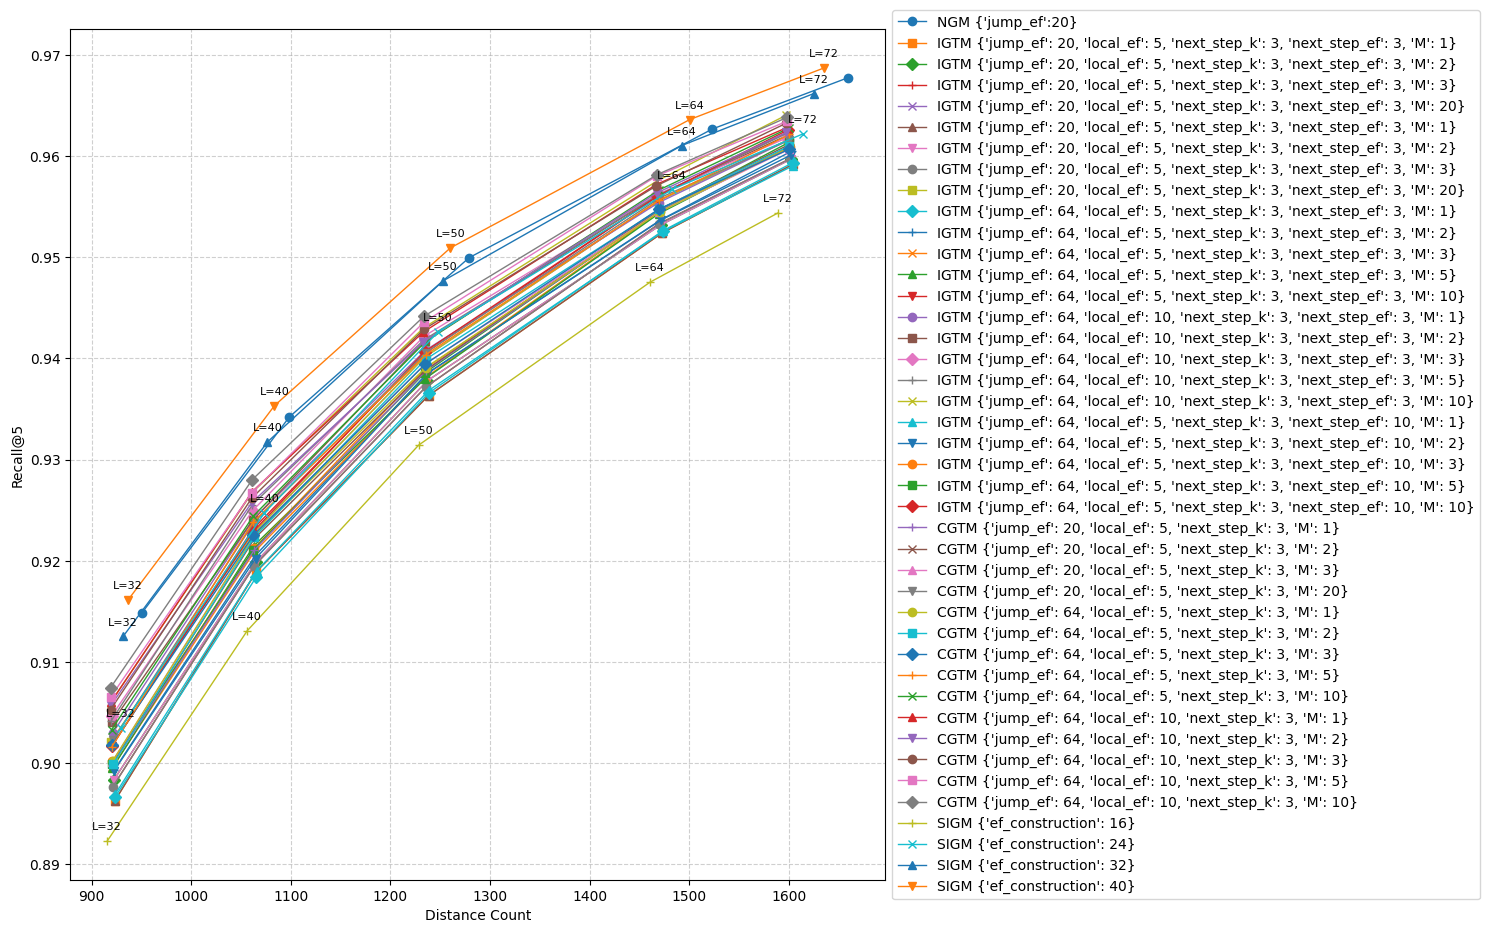

In [282]:
# Список доступных стилей маркеров
marker_styles = ['o', 's', 'D', '+', 'x', '^', 'v']

recall_cols = [c for c in df if c[-6:] == 'recall']
dist_count_cols = [c for c in df if c[-10:] == 'dist count']
efs= [int(c.split()[0][3:]) for c in df if c[-6:] == 'recall']

# Создаем фигуру и оси
fig, ax = plt.subplots(figsize=(15, 10))

# Итерируемся по строкам DataFrame
for i, row in df.iterrows():
    x_values = row[dist_count_cols]
    y_values = row[recall_cols]
    
    # Отрисовываем линию
    ax.plot(
        x_values,
        y_values,
        label=row['algorithm'] + ' ' + row['params'],
        marker=marker_styles[i % len(marker_styles)],
        markersize=6,
        linewidth=1
    )

    if row['algorithm'] == 'SIGM':
        # Добавляем аннотации рядом с каждым маркером
        for x, y, ef in zip(x_values, y_values, efs):
            ax.annotate(
                f'L={ef}',   # Текст аннотации
                (x, y),                   # Координаты точки
                textcoords="offset points",  # Позиционирование относительно точки
                xytext=(0, 8),            # Смещение текста (в пикселях)
                ha='center',              # Горизонтальное выравнивание
                fontsize=8,               # Размер шрифта
                color='black'
            )

# Настройка макета графика
ax.set_xlabel("Distance Count")
ax.set_ylabel("Recall@5")

# Легенда вне графика
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.00, 0.5)
)

# Сетка
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Сохраняем и отображаем
plt.savefig("../paper/figs/recall_vs_distance_count.pdf", format='pdf', bbox_inches='tight')
plt.show()

# 5@Recall vs Merge Efforts

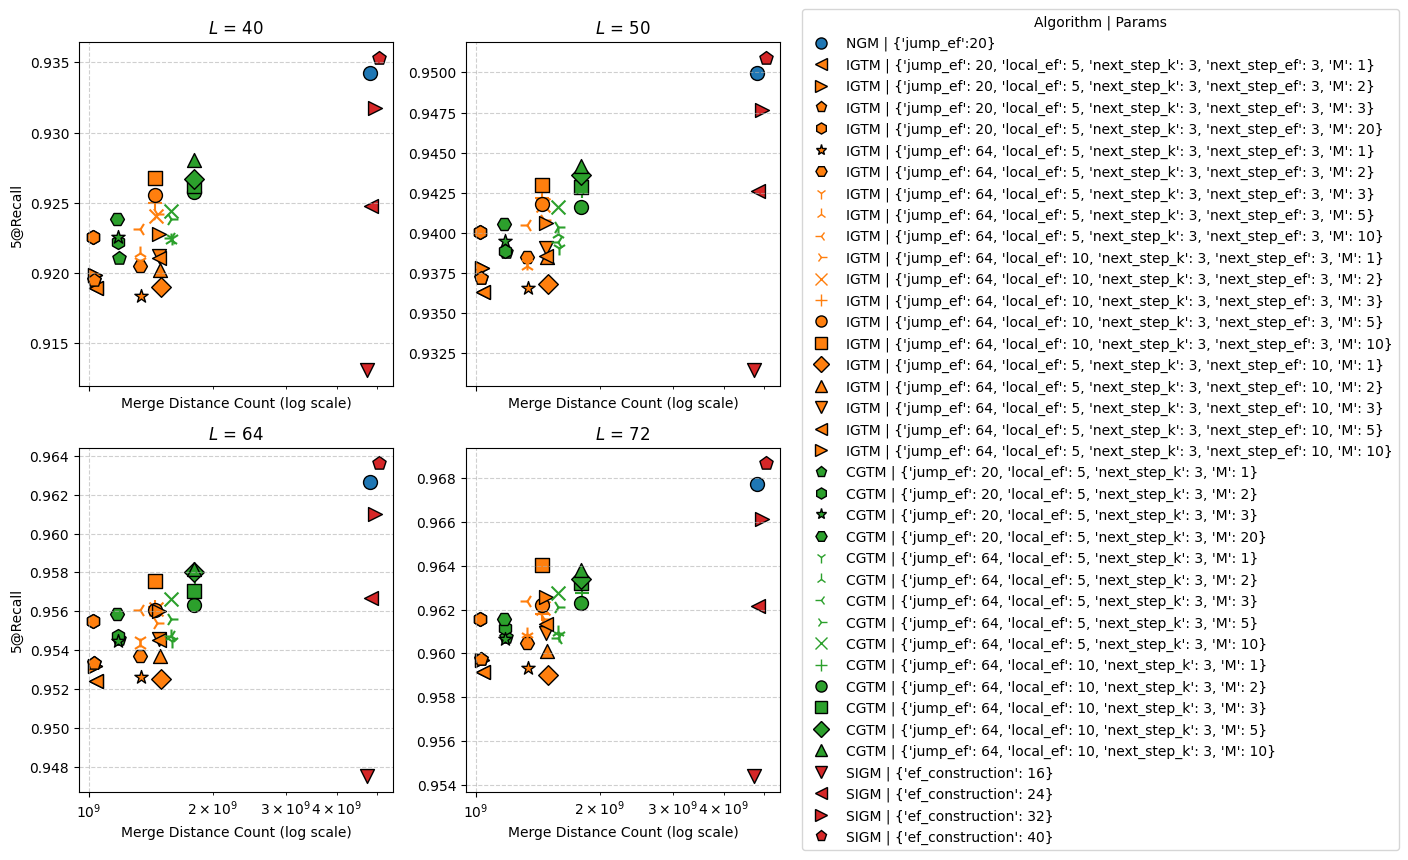

In [271]:
# Настройка
ef_values = [40, 50, 64, 72]
recall_cols = [f'ef={ef} 5@recall' for ef in ef_values]
colors = plt.cm.tab10.colors
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '*', 'H', '1', '2', '3', '4', 'x', '+']
filled_markers = {'o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '*', 'H'}

colors_dict = { alg:color_index for color_index, alg in enumerate( df.algorithm.unique()) }

# Стиль по комбинации алгоритма и параметров

style_map = {}
for i, row in df.iterrows():
    key = f"{row['algorithm']} | {row['params']}"
    color =  colors_dict[row['algorithm']],
    
    # style_map[key] = (colors[i % len(colors)], markers[i % len(markers)])
    style_map[key] = (colors[colors_dict[row.algorithm]], markers[i % len(markers)])

# Фигуры и оси
fig, axs = plt.subplots(2, 2, figsize=(8, 8.5), sharex=True, sharey=False)
axs = axs.flatten()

for i, ef in enumerate(ef_values):
    ax = axs[i]
    recall_col = f'ef={ef} 5@recall'
    for _, row in df.iterrows():
        x = row['merge distance count']
        y = row[recall_col]
        label = f"{row['algorithm']} | {row['params']}"
        color, marker = style_map[label]
        kwargs = {
            'x': x,
            'y': y,
            'color': color,
            'marker': marker,
            's': 100,
            'alpha':1.0
        }
        if marker in filled_markers:
            kwargs['edgecolors'] = 'black'
        ax.scatter(**kwargs)

    ax.set_xscale('log')
    ax.set_title(f'$L$ = {ef}')
    ax.set_xlabel('Merge Distance Count (log scale)')
    # ax.grid(True)
    ax.grid(True, linestyle='--', alpha=0.6) 

# Общая ось Y
for ax in axs[::2]:
    ax.set_ylabel('5@Recall')

# Легенда
handles = []
labels = []
for label, (color, marker) in style_map.items():
    handle = plt.Line2D([], [], marker=marker, color=color, linestyle='None',
                        markersize=8, label=label,
                        markeredgecolor='black' if marker in filled_markers else None)
    handles.append(handle)
    labels.append(label)

fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.00, 0.5), title='Algorithm | Params')
plt.tight_layout(rect=[0, 0, 1.0, 1])
plt.savefig("../paper/figs/recall_vs_merge_distance_count.pdf", format="pdf", bbox_inches="tight")
plt.show()